In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd

df = pd.read_csv('./receptivo.csv')

# Contando valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrando las columnas que tienen valores nulos
null_columns = null_counts[null_counts > 0]

print(null_columns)

df_cleaned = df.dropna()

# Columnas especificadas a mantener
columns_to_keep_final = ['FechaIngreso', 'Pais', 'Motivo', 'Alojamiento', 'Estadia', 'Gente', 'GastoTotal']

# Filtrando el conjunto de datos
final_data_reduced = df_cleaned[columns_to_keep_final]

# Eliminando duplicados de columnas
df_reducido = final_data_reduced.loc[:,~final_data_reduced.columns.duplicated()]

df_reducido['Año'] = pd.to_datetime(df_reducido['FechaIngreso']).dt.year
df_reducido['Mes'] = pd.to_datetime(df_reducido['FechaIngreso']).dt.month
df_reducido['Dia'] = pd.to_datetime(df_reducido['FechaIngreso']).dt.day

# Eliminando la columna original 'FechaIngreso'
df_reducido = df_reducido.drop('FechaIngreso', axis=1)

df_reducido.head()


C:\Users\jisau\AppData\Local\Temp\ipykernel_26964\3164811602.py:3: DtypeWarning: Columns (17,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./receptivo.csv')


IsEstudio             8043
Estudio               8043
IdDestinoLocalidad       8
Localidad                8
Departamento             8
Otro Departamento     8043
IdOtraLocalidad       8043
Otra Localidad        8043
dtype: int64


,Pais,Motivo,Alojamiento,Estadia,Gente,GastoTotal,Año,Mes,Dia
0,Ecuador,Otros,Hotel 3 estrellas,9,3,3213.0,2017,2,22
1,Brasil,Ocio y vacaciones,Hotel 4 estrellas,4,2,2016.0,2017,1,5
2,Paraguay,Ocio y vacaciones,Hotel 4 estrellas,8,2,3846.0,2017,1,4
3,Paraguay,Ocio y vacaciones,Hotel 3 estrellas,8,3,3696.0,2017,1,18
4,Argentina,Ocio y vacaciones,Hotel 3 estrellas,15,2,6686.0,2017,1,2


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

encoder = OneHotEncoder(sparse=False)
variables_categoricas = df_reducido[['Pais', 'Motivo', 'Alojamiento']]
variables_categoricas_encoded = encoder.fit_transform(variables_categoricas)

# Creando un nuevo DataFrame con las variables codificadas
variables_categoricas_encoded_df = pd.DataFrame(variables_categoricas_encoded, 
                                                columns=encoder.get_feature_names(['Pais', 'Motivo', 'Alojamiento']))

# Concatenando con el DataFrame original (sin las columnas categóricas originales)
df_reducido = df_reducido.drop(['Pais', 'Motivo', 'Alojamiento'], axis=1)
df_reducido_encoded = pd.concat([df_reducido, variables_categoricas_encoded_df], axis=1)

# Normalización de las características
scaler = StandardScaler()
df_reducido_scaled = scaler.fit_transform(df_reducido_encoded)

# Aplicando K-Means
# Puedes elegir el número de clústeres (k) después de realizar un análisis, como el método del codo
k = 12  # Ejemplo
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(df_reducido_scaled)

# Agregando las etiquetas de clúster al DataFrame
df_reducido_encoded['Cluster'] = clusters

C:\Users\jisau\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
# Asumiendo que df_reducido_encoded contiene tus datos con las características codificadas y 'clusters' son tus etiquetas de clúster
df_reducido_encoded['Cluster'] = clusters

# Calculando el valor promedio para cada característica en cada clúster
promedios_por_cluster = df_reducido_encoded.groupby('Cluster').mean()

# Mostrando los resultados
promedios_por_cluster.head(12)

,Estadia,Gente,GastoTotal,Año,Mes,Dia,Pais_Africa u Oceania,Pais_Alemania,Pais_Argentina,Pais_Bolivia,...,Alojamiento_Hotel/Albergue,Alojamiento_Motor Home,Alojamiento_Ninguno,Alojamiento_Otros,Alojamiento_Sin Datos,Alojamiento_Tiempo Compartido,Alojamiento_Vivienda arrendada,Alojamiento_Vivienda familiares/amigos no residentes,Alojamiento_Vivienda familiares/amigos residentes,Alojamiento_Vivienda propia
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.269939,2.122699,499.544785,2018.889571,6.460123,15.024540,0.000000,0.000000,0.288344,0.000000,...,0.000000,0.000000,0.196319,0.012270,0.000000,0.000000,0.000000,0.018405,0.220859,0.000000
1,6.042645,2.040853,636.402336,2018.648719,6.427880,14.539330,0.000538,0.000985,0.258466,0.001702,...,0.000000,0.000000,0.000269,0.000985,0.000000,0.000000,0.001433,0.000985,0.979574,0.005555
2,5.393678,2.404783,1448.342468,2018.299841,5.935543,14.480581,0.002527,0.004172,0.664845,0.001234,...,0.000000,0.010165,0.000000,0.010283,0.000118,0.005288,0.000000,0.086374,0.129914,0.052706
3,0.214712,2.862160,152.374874,2018.452286,5.204771,15.217031,0.001657,0.001988,0.666998,0.002651,...,0.000000,0.000000,0.860835,0.000331,0.000000,0.000000,0.000663,0.001657,0.004970,0.000000
4,7.974359,1.948718,1434.656795,2018.589744,6.461538,15.551282,0.000000,0.000000,0.000000,0.000000,...,0.102564,0.000000,0.141026,0.012821,0.000000,0.000000,0.025641,0.012821,0.089744,0.000000
5,5.160319,2.167161,1993.641277,2018.274344,5.864082,14.457241,0.001824,0.005929,0.498290,0.001140,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,4.477095,2.092737,1295.118670,2021.465363,7.916760,14.540782,0.000559,0.003911,0.485475,0.001676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,5.953642,1.834437,337.330795,2018.443709,6.218543,14.503311,0.000000,0.000000,0.642384,0.006623,...,0.006623,0.000000,0.006623,0.456954,0.000000,0.000000,0.000000,0.000000,0.397351,0.006623
8,9.443907,3.713660,3384.323324,2018.547570,4.829072,14.414190,0.000000,0.004147,0.669661,0.002073,...,0.000000,0.000921,0.000000,0.000921,0.000000,0.000230,0.848652,0.001152,0.004147,0.045151


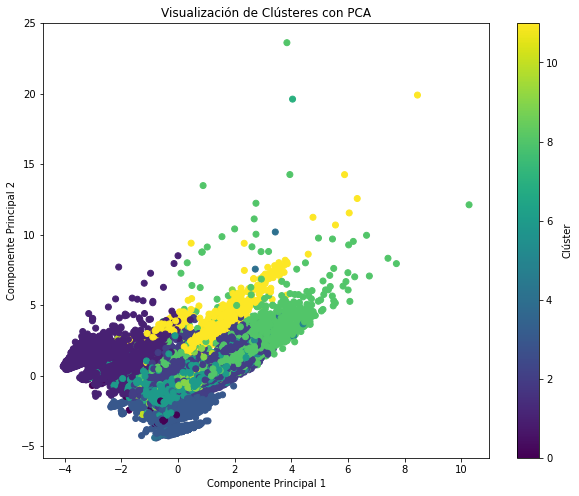

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Asumiendo que df_reducido_scaled es tu conjunto de datos normalizado y que 'clusters' son tus etiquetas de clúster

# Aplicando PCA
pca = PCA(n_components=2)  # Reduciendo a 2 dimensiones para visualización
principal_components = pca.fit_transform(df_reducido_scaled)

# Creando un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadiendo las etiquetas de clúster
pca_df['Cluster'] = clusters

# Visualización
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Visualización de Clústeres con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clúster')
plt.show()

In [35]:
# Asumiendo que pca_df es tu DataFrame con componentes principales y etiquetas de clúster
promedios_pca_por_cluster = pca_df.groupby('Cluster').mean()

# Mostrando los resultados
promedios_pca_por_cluster.head()

,PC1,PC2
Cluster,,
0,-0.580744,-1.953969
1,-2.696013,0.797953
2,0.865700,-0.329547
3,0.026912,-3.324759
4,0.274074,-1.052116


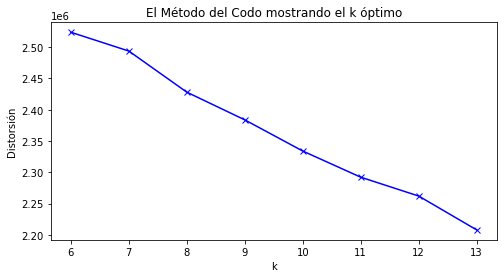

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Asumiendo df_reducido_scaled como tu conjunto de datos normalizado
distortions = []
K = range(6,14)  # Puedes ajustar este rango según sea necesario

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_reducido_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('El Método del Codo mostrando el k óptimo')
plt.show()


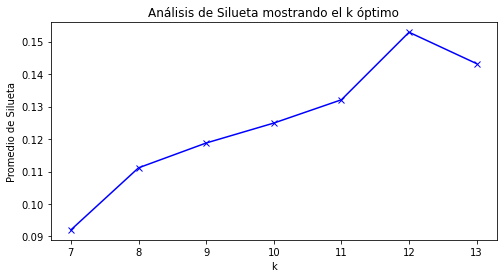

In [30]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
K = range(7, 14)  # El análisis de silueta no se puede calcular con un solo clúster

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels = kmeanModel.fit_predict(df_reducido_scaled)
    silhouette_avg.append(silhouette_score(df_reducido_scaled, cluster_labels))

plt.figure(figsize=(8,4))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Promedio de Silueta')
plt.title('Análisis de Silueta mostrando el k óptimo')
plt.show()
